In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Property_Sales.csv')
df.head()

,X,Y,object_id,parcel_number,address,sale_number,sale_date,sale_price,grantor,grantee,liberpage,sale_terms,verified_by,sale_instrument,sale_trans,property_class,ecf
0,NaN,NaN,1,27090613.,8300 WEST PARKWAY,1,2011/02/03 00:00:00+00,15000,FEDERAL HOUSING,"HATCHER, ALICIA",NaN,SPECIAL ACTS,PTA,PTA,100.0,702.0,RET
1,NaN,NaN,2,27072376.,19158 MALLINA,1,2011/03/22 00:00:00+00,74687,WAYNE COUNTY SHERIFF,FEDERAL HOME LOAN MORTGAGE CORP,NaN,SPECIAL ACTS,PTA,PTA,0.0,702.0,RET
2,NaN,NaN,3,27072376.,19158 MALLINA,1,2011/06/20 00:00:00+00,19000,FEDERAL HOME LOAN MORTGAGE CORP,"COLEMAN, SHANNTHIA",NaN,SPECIAL ACTS,TITLE COMPANY,PTA,100.0,702.0,RET
3,NaN,NaN,4,27073468.,17630 WESTMORELAND,1,2011/11/18 00:00:00+00,15000,"SIMS, MARILYN T","JORDAN, WILLIE J",NaN,SPECIAL ACTS,PTA,PTA,100.0,702.0,RET
4,NaN,NaN,5,27071714.,19325 HARTWELL,1,2011/05/12 00:00:00+00,0,"GLOBAL POWER EQUITIES, LLC EIDI, I",MARLBOROUGH TRUST CO,NaN,SPECIAL ACTS,PTA,WD,0.0,702.0,RET


In [3]:
df.dtypes

X                  float64
Y                  float64
object_id            int64
parcel_number       object
address             object
sale_number          int64
sale_date           object
sale_price           int64
grantor             object
grantee             object
liberpage           object
sale_terms          object
verified_by         object
sale_instrument     object
sale_trans         float64
property_class     float64
ecf                 object
dtype: object

In [4]:
df.describe()

,X,Y,object_id,sale_number,sale_price,sale_trans,property_class
count,3.056990e+05,3.056990e+05,320561.000000,320561.000000,3.205610e+05,320561.000000,320553.000000
mean,-9.251809e+06,5.219786e+06,160281.000000,1.039640,7.886580e+04,70.679626,391.008663
std,1.119365e+04,5.762043e+03,92538.134158,0.215503,3.581448e+06,45.521623,72.219755
min,-9.271508e+06,5.199358e+06,1.000000,1.000000,0.000000e+00,0.000000,1.000000
25%,-9.261473e+06,5.215612e+06,80141.000000,1.000000,1.000000e+00,0.000000,401.000000
50%,-9.253750e+06,5.220827e+06,160281.000000,1.000000,2.000000e+03,100.000000,401.000000
75%,-9.241867e+06,5.224541e+06,240421.000000,1.000000,2.300000e+04,100.000000,401.000000
max,-9.229699e+06,5.228621e+06,320561.000000,7.000000,7.000000e+08,100.000000,921.000000


recency : sale_date
frequency : 
monetization : sale_price

In [5]:
# Get data for 2020
df_2020 = df[(df['sale_date']>='2020/01/01') & (df['sale_date']<='2020/12/31')].copy()
# Add column sale_datetime -> convert column sale_date to datetime type
df_2020['sale_datetime'] = pd.to_datetime(df_2020['sale_date'].str[:10], format='%Y/%m/%d')
# 2011/02/03 00:00:00+00

In [6]:
df_2020.head()

,X,Y,object_id,parcel_number,address,sale_number,sale_date,sale_price,grantor,grantee,liberpage,sale_terms,verified_by,sale_instrument,sale_trans,property_class,ecf,sale_datetime
11090,-9.268510e+06,5.219213e+06,11091,22115989.,14011 DACOSTA,1,2020/01/07 00:00:00+00,1,"JONES, DOMINIC","JONES, DONNA",NaN,NO CONSIDERATION,PTA,PTA,100.0,401.0,8016A,2020-01-07
11094,-9.233015e+06,5.224400e+06,11095,21068128.,10910 MCKINNEY,1,2020/01/02 00:00:00+00,66000,BMF PROPERTY GROUP LLC,JULIUS PROPERTIES LLC,NaN,MULTI PARCEL REF,PTA,PTA,100.0,402.0,2087B,2020-01-02
11124,-9.239882e+06,5.215972e+06,11125,17008639.003,3429 MAXWELL,1,2020/01/31 00:00:00+00,0,"HAMILTON, GUINEVERE","HAMILTON, MARK",NaN,NO CONSIDERATION,PTA,PTA,0.0,401.0,3141A,2020-01-31
11140,-9.237479e+06,5.228054e+06,11141,21026153.,13871 BRINGARD DR,1,2020/01/02 00:00:00+00,1,"MORRELL, AARON","ALBERT, LETICIA",NaN,NO CONSIDERATION,PTA,PTA,100.0,401.0,2075A,2020-01-02
11149,-9.264561e+06,5.226815e+06,11150,22078927.,19935 FAUST,1,2020/01/15 00:00:00+00,1,"GOLDEN, JEANNE","FORD, KEVIN",NaN,NO CONSIDERATION,PTA,PTA,100.0,401.0,8005A,2020-01-15


In [7]:
print('Min:{}; Max:{}'.format(min(df_2020.sale_datetime),
                            max(df_2020.sale_datetime)))

Min:2020-01-01 00:00:00; Max:2020-12-30 00:00:00


In [8]:
import datetime as dt
snapshot_date = max(df_2020.sale_datetime) + dt.timedelta(days=1)
print(snapshot_date)

2020-12-31 00:00:00


In [9]:
# aggregate data on address level
# datamart = df_2020.groupby(['address']).count()
datamart = df_2020.groupby(['grantee']).agg({
    'sale_datetime': lambda x: (snapshot_date - x.max()).days,
    'sale_price' : 'sum',
    'parcel_number' : 'count'
})
datamart.rename(columns = {
    'sale_datetime' : 'recency',
    'parcel_number' : 'frequency',
    'sale_price' : 'monetary_value'
}, inplace=True)
datamart.head()

,recency,monetary_value,frequency
grantee,,,
"ANDERSON, DELORIA",50,0,1
KASHEM MIAH LLC,69,46500,1
"KING, SHANE",337,1000,1
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1
"WALKER ,WILLIAM",358,279800,2


In [10]:
r_labels = range(4,0,-1)
r_quartiles = pd.qcut(datamart['recency'],4,labels=r_labels)
datamart = datamart.assign(r=r_quartiles)
datamart.head()

,recency,monetary_value,frequency,r
grantee,,,,
"ANDERSON, DELORIA",50,0,1,4
KASHEM MIAH LLC,69,46500,1,4
"KING, SHANE",337,1000,1,1
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1,1
"WALKER ,WILLIAM",358,279800,2,1


In [11]:
m_quartiles = pd.qcut(datamart['monetary_value'],4,labels=range(1,5))
datamart = datamart.assign(m=m_quartiles)
datamart.head()

,recency,monetary_value,frequency,r,m
grantee,,,,,
"ANDERSON, DELORIA",50,0,1,4,1
KASHEM MIAH LLC,69,46500,1,4,3
"KING, SHANE",337,1000,1,1,1
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1,1,1
"WALKER ,WILLIAM",358,279800,2,1,4


In [12]:
f_quartiles = pd.qcut(datamart['frequency'],1,labels=range(1,0,-1))
datamart = datamart.assign(f=f_quartiles)
datamart.head()

,recency,monetary_value,frequency,r,m,f
grantee,,,,,,
"ANDERSON, DELORIA",50,0,1,4,1,1
KASHEM MIAH LLC,69,46500,1,4,3,1
"KING, SHANE",337,1000,1,1,1,1
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1,1,1,1
"WALKER ,WILLIAM",358,279800,2,1,4,1


In [13]:
def join_rfm(x) : return str(x['r']) + str(x['m']) + str(x['f'])
datamart['segment'] = datamart.apply(join_rfm, axis=1)
datamart['score'] = datamart[['r','m','f']].sum(axis=1)
datamart.head()

,recency,monetary_value,frequency,r,m,f,segment,score
grantee,,,,,,,,
"ANDERSON, DELORIA",50,0,1,4,1,1,411,6
KASHEM MIAH LLC,69,46500,1,4,3,1,431,8
"KING, SHANE",337,1000,1,1,1,1,111,3
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1,1,1,1,111,3
"WALKER ,WILLIAM",358,279800,2,1,4,1,141,6


In [14]:
# Check Biggest Size / count of each segment
datamart.groupby('segment').size().sort_values(ascending=False)[:10]

segment
211    824
111    820
441    699
341    638
311    608
331    580
131    533
431    531
231    518
411    516
dtype: int64

In [15]:
datamart[datamart['segment']=='11'][:5]

,recency,monetary_value,frequency,r,m,f,segment,score
grantee,,,,,,,,


In [16]:
datamart.groupby('score').agg({
    'recency' : 'mean',
    'monetary_value' : ['mean','count']
}).round(1)

recency monetary_value      
         mean           mean count
score                             
3       336.6          297.4   820
4       304.9         1486.6  1270
5       252.0        12878.9  1533
6       202.6       187568.7  1781
7       166.7       111826.1  1531
8       113.0       275285.0  1169
9        55.2       816017.6   699

In [17]:
def segment_cat(df):
    if df['score']>= 7:
        return 'Premium'
    elif (df['score']>=4):
        return 'Normal'
    else :
        return 'Bad'
    
datamart['segment_category']=datamart.apply(segment_cat,axis=1)
datamart.groupby('segment_category').agg({
    'recency' : 'mean',
    'monetary_value' : ['mean','count']
}).round(1)

recency monetary_value      
                    mean           mean count
segment_category                             
Bad                336.6          297.4   820
Normal             247.5        77594.1  4584
Premium            125.3       312859.7  3399

<h2>PREPROCESSING START GO!</h2>

In [18]:
datamart.head()

,recency,monetary_value,frequency,r,m,f,segment,score,segment_category
grantee,,,,,,,,,
"ANDERSON, DELORIA",50,0,1,4,1,1,411,6,Normal
KASHEM MIAH LLC,69,46500,1,4,3,1,431,8,Premium
"KING, SHANE",337,1000,1,1,1,1,111,3,Bad
RUSSELL & LINDA KRAMER LIFE ESTATE,321,1,1,1,1,1,111,3,Bad
"WALKER ,WILLIAM",358,279800,2,1,4,1,141,6,Normal


In [19]:
datamart.dtypes

recency                int64
monetary_value         int64
frequency              int64
r                   category
m                   category
f                   category
segment               object
score                  int64
segment_category      object
dtype: object

C:\Users\Cermati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cermati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


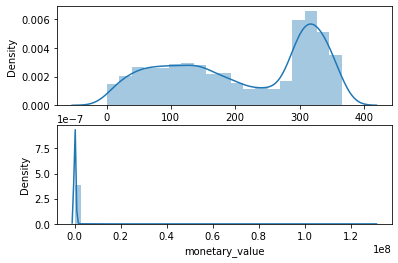

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.subplot(2,1,1)
sns.distplot(datamart['recency'])
plt.subplot(2,1,2)
sns.distplot(datamart['monetary_value'])
plt.show()

C:\Users\Cermati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


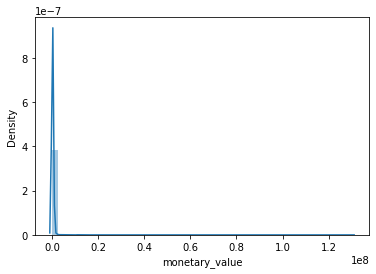

In [21]:
sns.distplot(datamart['monetary_value'])
plt.show()

C:\Users\Cermati\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Cermati\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


OverflowError: cannot convert float infinity to integer

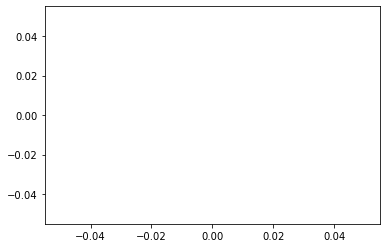

In [22]:
import numpy as np
monetary_value_log = np.log(datamart['monetary_value'])
sns.distplot(monetary_value_log)
plt.show()

In [ ]:
datamart.describe()

,recency,monetary_value,frequency,score
count,8803.000000,8.803000e+03,8803.000000,8803.00000
mean,208.587641,1.612343e+05,1.312280,5.93559
std,111.366782,2.339759e+06,2.338891,1.73364
min,1.000000,0.000000e+00,1.000000,3.00000
25%,107.000000,1.000000e+03,1.000000,5.00000
50%,213.000000,1.000000e+04,1.000000,6.00000
75%,314.000000,6.290000e+04,1.000000,7.00000
max,365.000000,1.300000e+08,126.000000,9.00000


In [25]:
datamart_rfm = datamart[['recency','frequency','monetary_value']].copy()
datamart_centered = datamart_rfm - datamart_rfm.mean()
datamart_centered.describe().round(2)

,recency,frequency,monetary_value
count,8803.00,8803.00,8.803000e+03
mean,0.00,-0.00,0.000000e+00
std,111.37,2.34,2.339759e+06
min,-207.59,-0.31,-1.612343e+05
25%,-101.59,-0.31,-1.602343e+05
50%,4.41,-0.31,-1.512343e+05
75%,105.41,-0.31,-9.833428e+04
max,156.41,124.69,1.298388e+08


In [26]:
datamart_scaled = datamart_rfm / datamart_rfm.std()
datamart_scaled.describe().round(2)

,recency,frequency,monetary_value
count,8803.00,8803.00,8803.00
mean,1.87,0.56,0.07
std,1.00,1.00,1.00
min,0.01,0.43,0.00
25%,0.96,0.43,0.00
50%,1.91,0.43,0.00
75%,2.82,0.43,0.03
max,3.28,53.87,55.56


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)
print('mean : ', datamart_normalized.mean(axis=0).round(2))
print('std : ', datamart_normalized.std(axis=0).round(2))

mean :  [-0.  0.  0.]
std :  [1. 1. 1.]


In [ ]:
# Code below to convert data_normalized to dataframe
#     data_normalized -> array not dataframe

# data_normalized = pd.DataFrame(data_normalized
#                                , index=data.index
#                                , columns=data.columns)

Code below are the way to preprocessing data

In [28]:
# unskew the data
import numpy as np
datamart_log = np.log(datamart_rfm)

# normalize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_log)

# store for clustering
datamart_normalized = scaler.transform(datamart_log)

C:\Users\Cermati\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Input contains infinity or a value too large for dtype('float64').